### Wrap-up from lecture 9:  

1) Write a function that estimates the value of $\pi$ with a Monte Carlo approach:

- First, we want to create a random set of $n$ points dixtributed randomly inside a 2x2 square, so with x- and y- coordinates between 0 and 2.
- Then we count how many of these points lie inside a circle of radius 1 centered in the middle of the square.
- Because our points are randomly distributed, the ratio between the fraction of points that lie inside the circle gives you an estimate of the ratio between the area of the circle and the total area of the square:

$$
\frac{N_\rm{inside}}{N_\rm{total}} = \frac{A_\bigodot}{A_\square} = \frac{\pi}{4}
$$

In [2]:
import numpy as np

def approxpi(n, seed=0):
    """Estimates an approximate value of pi with a Monte Carlo approach.
    
    Args:
        n (int): number of points to scatter
        seed (int): random seed  
        
    Return:
        piapprox (float): estimate of the value of pi.
    """
    np.random.seed(seed)            # Ensures result is reproducible
    xarr = np.random.rand(n) * 2    # x coordinates
    yarr = np.random.rand(n) * 2    # y coordinates
    dist2arr = ((xarr - 1.0) ** 2 + # Distance (squared) of each point to the center
                (yarr - 1.0) ** 2
               )
    isincirc = dist2arr <= 1        # True for points in the circle, False for out
    incount = np.sum(isincirc)      # Number of points inside the circle 
                                    # (remember that True acts as 1, False as 0)
    piapprox = 4 * incount / n      
    return piapprox

print("With a million points, pi~", approxpi(1000000))

With a million points, pi~ 3.141688


2) Question about the role of the `if(__name__) == "__main__"` guard statement in scripts. Here's a more clear example of how it is used (from https://realpython.com/if-name-main-python/):

```python

def echo(text: str, repetitions: int = 3) -> str:
    """Imitate a real-world echo."""
    echoed_text = ""
    for i in range(repetitions, 0, -1):
        echoed_text += f"{text[-i:]}\n"
    return f"{echoed_text.lower()}."

if __name__ == "__main__":
    text = input("Yell something at a mountain: ")
    print(echo(text))
```

You will see that, running as a script, `__main__` is executed and you are prompted for input. However, you can also import as a module in your Jupyter notebook, in which case you can access `echo`, but `__main__` will not be executed.

# Fitting and optimization

We will use scipy (https://scipy.org/) for fitting and optimization, in particular scipy.optimize (https://docs.scipy.org/doc/scipy/reference/optimize.html).

## Fitting a scatter plot

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [4]:
xdata = np.array([ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
ydata = np.array([1.2, 4.2, 5.2, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 4.9, 2.1])

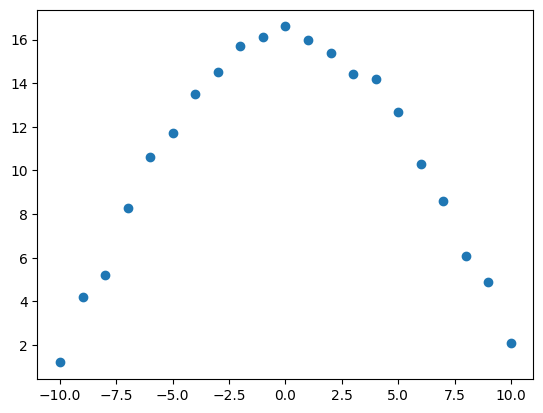

In [5]:
plt.scatter(xdata, ydata)

#### Let's try and fit a Gaussian to our data

In [6]:
# Define the Gaussian function
def gaussian(x, a, b):
    y = a * np.exp(-b * x ** 2)
    return y

# We use curve_fit (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), which has required inputs: 1) the fit function f 2) an array of data points in x 3) an array of data points in y
# curve_fit returns as default optimal values for f for a least-squares fit, and the covariance matrix, as an array and 2D array, respectively
parameters, covariance = opt.curve_fit(gaussian, xdata, ydata)
print(parameters)
fitted_a, fitted_b = parameters
print(fitted_a, fitted_b)

[1.69383915e+01 1.58639061e-02]
16.938391501961814 0.015863906100507915


/var/folders/7p/db_z7hz17_x3vxqqj29hkd0m0000gn/T/ipykernel_5500/507890414.py:3: RuntimeWarning: overflow encountered in exp
  y = a * np.exp(-b * x ** 2)


#### Let's overplot the fit function with the optimal values over the data 

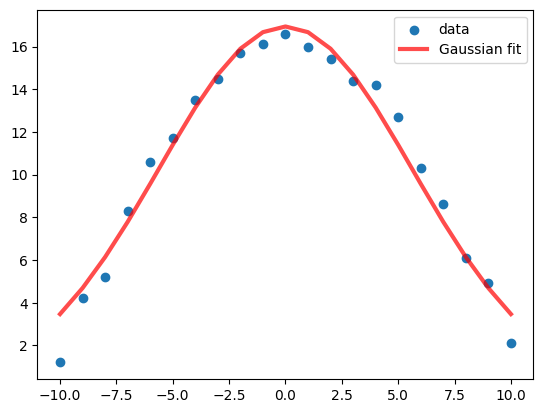

In [7]:
fit_y = gaussian(xdata, fitted_a, fitted_b)
plt.scatter(xdata, ydata, label='data')
plt.plot(xdata, fit_y, '-', label='Gaussian fit', color='r', lw=3,alpha=0.7)
plt.legend()
plt.show()

#### We can get the uncertainties from the covariance matrix:

In [8]:
print(covariance)
sigma_a = covariance[0,0] ** 0.5
sigma_b = covariance[1,1] ** 0.5

print(f"\nsigma_a={sigma_a:.1e}, sigma_b={sigma_b:.1e}")

[[1.27597034e-01 1.89676440e-04]
 [1.89676440e-04 7.58907818e-07]]

sigma_a=3.6e-01, sigma_b=8.7e-04


#### We can also plot the correlation matrix

In [9]:
def cov2cor(cov):
    '''Convert the covariance matrix to the correlation matrix'''
    D = np.diag(1 / np.sqrt(np.diag(cov)))
    return D @ cov @ D

array([[1.        , 0.60953491],
       [0.60953491, 1.        ]])

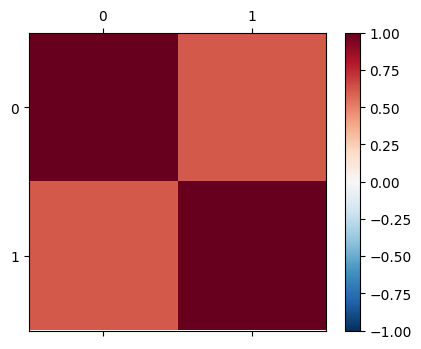

In [10]:
correlation_matrix = cov2cor(covariance)

plt.matshow(correlation_matrix, vmin=-1, vmax=1, cmap='RdBu_r')
plt.colorbar(shrink=0.8);

correlation_matrix

#### Exercise: now try and fit a cosine

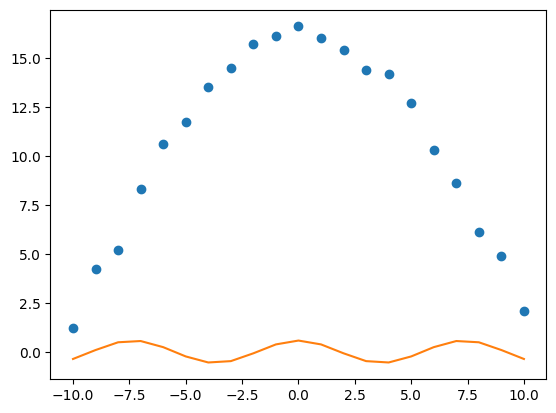

In [11]:
def cos_func(x, D, E):
    y = D*np.cos(E*x)
    return y

parameters, covariance = opt.curve_fit(cos_func, xdata, ydata)
fitted_d = parameters[0]
fitted_e = parameters[1]

fit_cosine = cos_func(xdata, fitted_d, fitted_e)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='cosine fit')

### Exercise: fit with an initial guess
You can make an initial guess for the parameters of the function, passing curve_fit() a list or array of guesses for the function parameters. This is an optional parameter. 

[16.29221863  0.1466471 ]


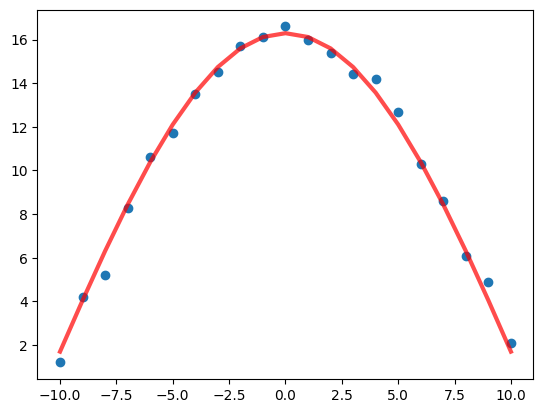

In [12]:
guess = [16, 0.1]
parameters, covariance = opt.curve_fit(cos_func, xdata, ydata, p0=guess)
fitted_d, fitted_e = parameters

fit_cosine = cos_func(xdata, fitted_d, fitted_e)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='cosine fit', color='r', lw=3,alpha=0.7)

print(parameters)

### Fitting data with error bars

#### First let's make some error bars in y

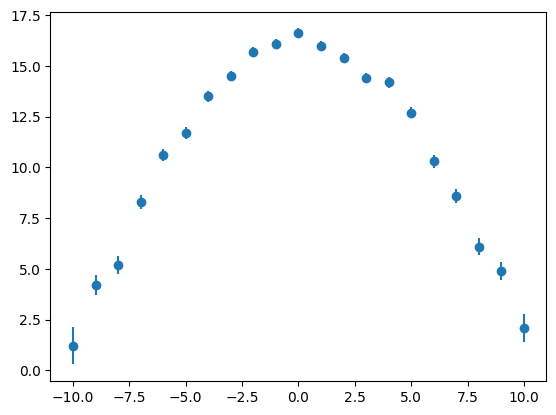

In [14]:
y_err = 1./np.sqrt(ydata)
plt.errorbar(xdata, ydata, yerr=y_err, fmt='o');

#### An array of uncertainties in y is an optional parameter for `curve_fit()`. This can be a 1D or 2D array (covariance matrix of errors in ydata for the latter). In general, `absolute_sigma` should be `True`, so that the covariance is calculated based on the absolute, rather than relative, values of the uncertainties. 

In [15]:
parameters, covariance = opt.curve_fit(gaussian, xdata, ydata, sigma=y_err,absolute_sigma=True)
print(parameters)
fitted_a, fitted_b = parameters
print(fitted_a, fitted_b)

[1.66325327e+01 1.41718888e-02]
16.632532733674683 0.014171888781359982


/var/folders/7p/db_z7hz17_x3vxqqj29hkd0m0000gn/T/ipykernel_5500/507890414.py:3: RuntimeWarning: overflow encountered in exp
  y = a * np.exp(-b * x ** 2)


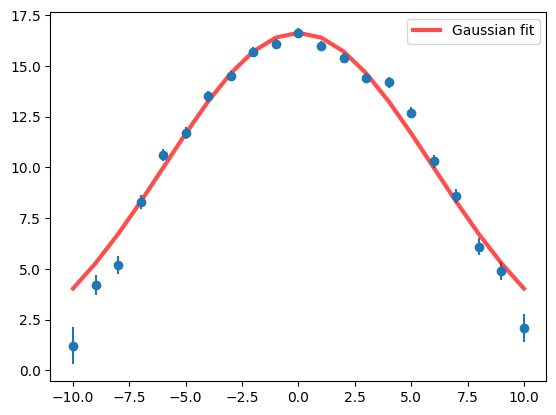

In [16]:
fit_y = gaussian(xdata, fitted_a, fitted_b)
plt.errorbar(xdata, ydata, yerr=y_err, fmt='o');
plt.plot(xdata, fit_y, '-', label='Gaussian fit', color='r', lw=3,alpha=0.7)
plt.legend()
plt.show()

## Fitting Histograms

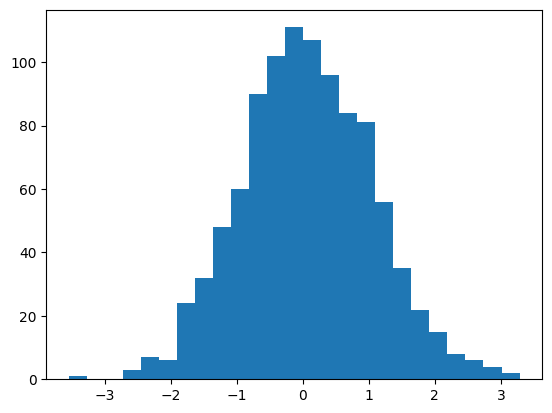

In [22]:
# Generate random data:
mean = 0
sigma = 1
x = np.random.normal(0, 1, 1000)
plt.hist(x, bins=25);

hist, bin_edges = np.histogram(x)
# normalize to unit area
hist=hist/sum(hist)

In [24]:
# Extract histogram values into numpy arrays
n = len(hist)
x_hist=np.zeros((n),dtype=float) 
for ii in range(n):
    x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    
y_hist=hist

print(x_hist)
print(y_hist)

[-3.20393077 -2.52102375 -1.83811674 -1.15520972 -0.4723027   0.21060431
  0.89351133  1.57641834  2.25932536  2.94223238]
[0.001 0.01  0.044 0.126 0.246 0.26  0.199 0.079 0.028 0.007]


#### Since we have extracted the x and y data into arrays, we can use `curve_fit` very similarly to when fitting a scatter plot, passing the fit function, and arrays of data in x and y.

In [25]:
# Gaussian least-square fitting process
# no initial guess
param_optimised,param_covariance_matrix = opt.curve_fit(gaussian,x_hist,y_hist)
# with an initial guess
# param_optimised,param_covariance_matrix = opt.curve_fit(gaussian,x_hist,y_hist,p0=[0.1, 0.9])

Text(0, 0.5, 'Probability')

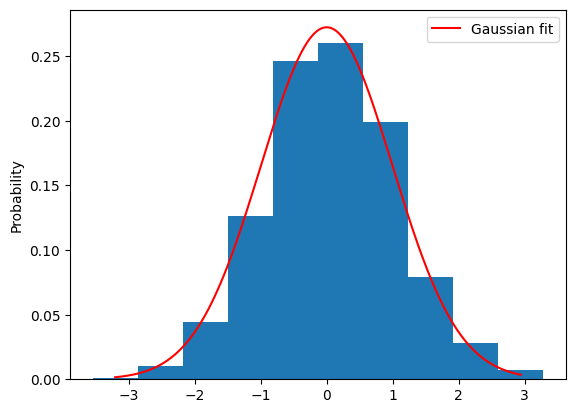

In [28]:
fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),1000)
plt.plot(x_hist_2,gaussian(x_hist_2,*param_optimised),'r',label='Gaussian fit')
plt.legend()

#Normalise the histogram values
weights = np.ones_like(x) / len(x)
plt.hist(x, weights=weights)

#setting the y-axis label
plt.ylabel("Probability")

## Minimization

#### Define the function to minimize and plot it.

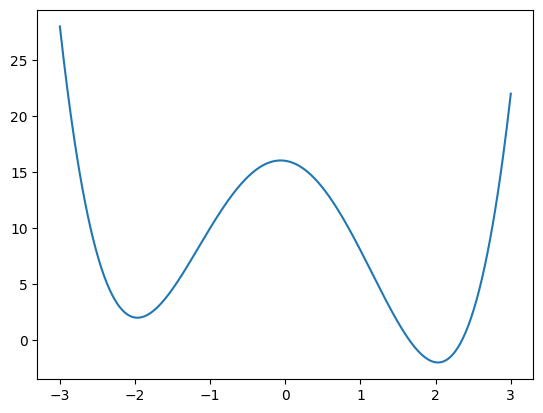

In [18]:
f = lambda x : (x - 2) ** 2 * (x + 2) ** 2 - x

x = np.linspace(-3,3,500)
plt.plot(x, f(x))
plt.show()

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -2.0153881900071995
       x: 2.030546617253404
     nit: 10
    nfev: 14


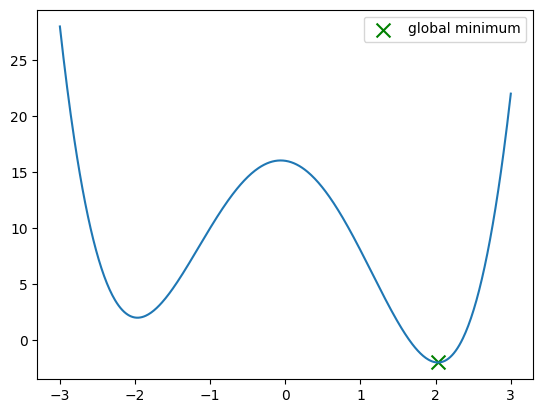

In [19]:
# We use minimize_scalar to find the minimum (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html). 
# Only required argument is the function to be minimized.
sol = opt.minimize_scalar(f)

print(sol)

plt.plot(x, f(x))
plt.scatter([sol.x], [sol.fun], marker='x', s=100, c='green',label='global minimum')
plt.legend()
plt.show()

 message: Solution found.
 success: True
  status: 0
     fun: 1.984122901328418
       x: -1.9679855231530974
     nit: 11
    nfev: 11


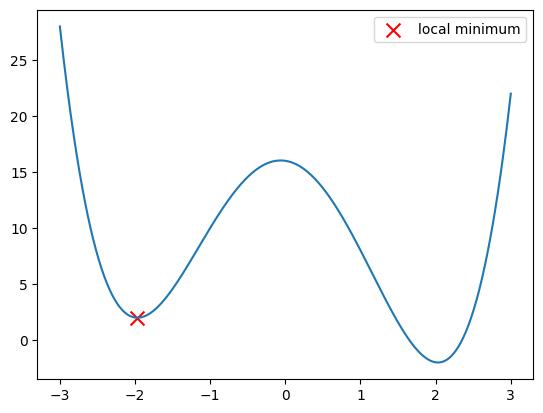

In [31]:
# To select a different local minimum: use bounded minimization

sol_local = opt.minimize_scalar(f, method='bounded', bounds=[-3,0])

print(sol_local)

plt.plot(x, f(x))
plt.scatter([sol_local.x], [sol_local.fun],marker='x', s=100, c='red', label='local minimum')
plt.legend()
plt.show()

### Visualizing your multi-dimensional functions

In [32]:
def egg_crate(x,y):
    return x ** 2 + y ** 2 + 25 * (np.sin(x) ** 2 + np.sin(y) ** 2)

In [33]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y)
Z = egg_crate(X,Y)
print (Z.shape)

(100, 100)


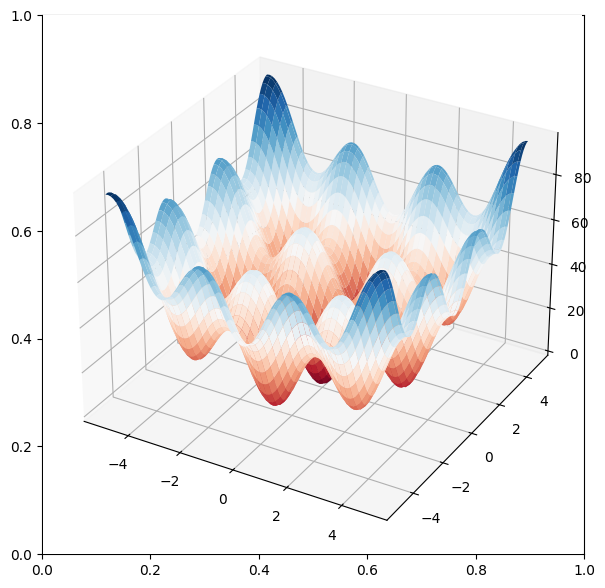

In [34]:
fig, ax = plt.subplots(figsize=(7,7))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='RdBu')

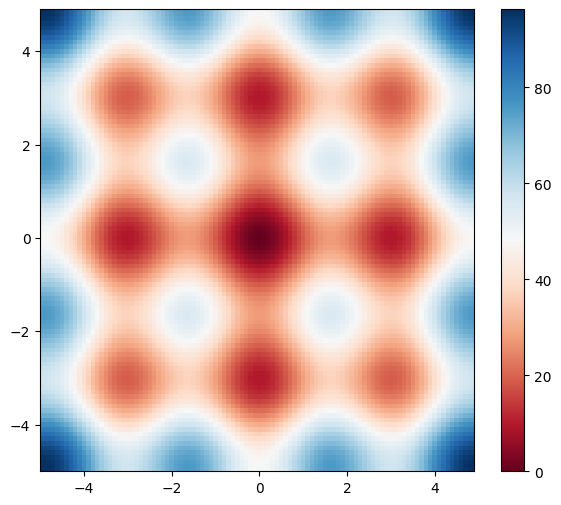

In [35]:
def plot_heat(X=X, Y=Y, Z=Z):
    fig, ax = plt.subplots(figsize=(7,6))
    c = ax.pcolormesh(X, Y, Z, cmap='RdBu', vmin=np.min(Z), vmax=np.max(Z))
    fig.colorbar(c, ax=ax)
    plt.axis([np.min(X), np.max(X), np.min(Y), np.max(Y)])
    
plot_heat()
plt.show()

### Getting creative with optimization methods

In [36]:
NPOINTS = 100
xguess = np.random.random(NPOINTS)
yguess = np.random.random(NPOINTS)

xguess = (xguess - 0.5) * 10
yguess = (yguess - 0.5) * 10

zguess = egg_crate(xguess, yguess)

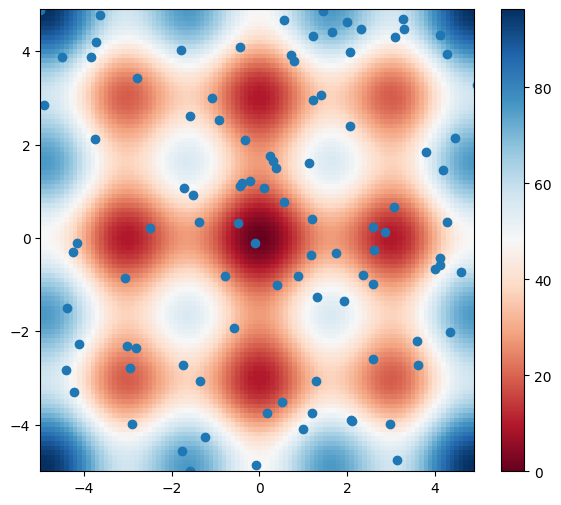

In [37]:
plot_heat()
plt.scatter(xguess, yguess)

plt.show()

In [38]:
def random_steps(npoints, maxstep=0.05):
    '''
    Create an array with length `npoints` containing 
    random steps of maximum size `maxstep`.
    '''
    steps = np.random.uniform(-maxstep, maxstep, npoints)
    return steps

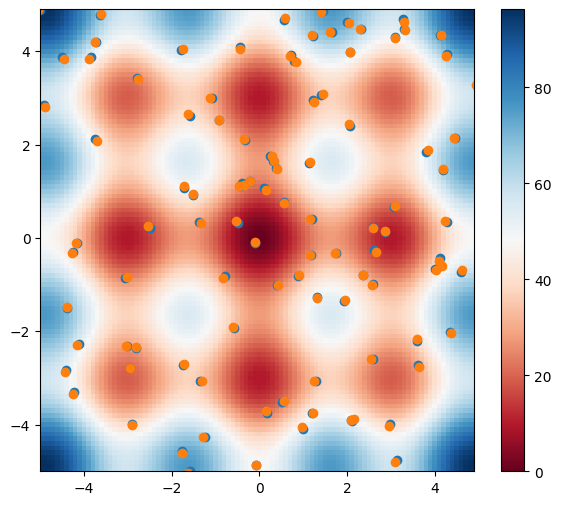

In [39]:
plot_heat()
plt.scatter(xguess, yguess)         # Old positions in blue

x_newguess = xguess + random_steps(NPOINTS) # Apply random steps to x values
y_newguess = yguess + random_steps(NPOINTS) # Apply random steps to y values

plt.scatter(x_newguess, y_newguess) # New positions in orange